# Air Resistance Simulation 
- By: Peggy Chen 
- February 16, 2025 
- The goal of this program is code air resistance in a projectile motion scenario. 

In [1]:
# Import libraries 
import matplotlib.pyplot as plt # This is used for the graphs! 
import math # Not always needed, but I like to have it just in case 
import numpy as np # Helps with various processes, like lists

In [2]:
# A ball is dropped from a tower of height h with initial velocity zero 
# Write a program that asks the user to enter the height in meters of the tower 
h = 100.0 #m, displacement and height of tower; NOT USED! 

# Knowns or assumptions  
m = 10 #kg 
g = np.array([0, -9.81]) #m/s/s, assuming constant acceleration into the earth due to gravity. 
rho = 1.225 #kg/m^3, density of air 
Cd = 0.47 #unitless, experimentally determined 
r = 0.65 #m, radius of ball 
A = np.pi*r**2 #m^2, cross sectional area 

# Initial vector conditions 
v_initial = 30
angle = np.deg2rad(25) #degrees 

# Initial conditions, based on my frame of reference with the top of the building being positive 
v = np.array([v_initial * np.cos(angle),v_initial * np.sin(angle)]) #m/s 
pos = np.array([0, 0]) #m, input from user 
t = 0 #s, starts at zero but we want to find the final time 
dt = 0.001 #s # Made the step size super small, the increased accuracy and so that I can check it by hand with kinematics 

# Creating a list for each variable interested in for our graph so the loop can deposit a value for each iteration 
tlist = [t] # First term is the initial condition of each variable time, position, and velocity 
xlist = [pos[0]] 
ylist = [pos[1]]
vxlist = [v[0]]
vylist = [v[1]]

# The while loop for our program  
while pos[1] >= 0: # The loop will stop once x = 0, or when the ball hits the ground (since, h is our initial displacement) 
    
    # Magnitude of the velocity 2 ways 
    vmag = np.sqrt(v[0]**2 + v[1]**2) #m/s Pythagorean method 
    # vmag = np.linalg.norm(v) #m/s, "normalized the components" 

    # Unit vector, aka direction of velocity 
    vhat = v / vmag # Same as vmag * v, because vmag**2 * (vhat/vmag) 
    
    F_g = m*g #N, only gravitational pull, 10kg * <0, -9.8>N/kg = <0, -98> N 
    F_drag = 0.5 * rho * (vmag**2) * Cd * A * (-vhat) #N, drag force 
    
    Fnet = F_g + F_drag # Adding drag into the equation 
    a = Fnet / m # Acceleration due to Newton's Second Law 
    
    v = v + a * dt # Subtracting the acceleration so we have increasingly negative velocity, based on frame of reference 
    pos = pos + v * dt # Calculating displacement starting at 100 m and each step subtracts a little more (v is negative, dt is positive) 
    t = t + dt # The imminent passage of time :) 

    # Appending our lists to graph - each iteration will add the subsequent value of each variable to a list
    vxlist.append(v[0])
    vylist.append(v[1])
    xlist.append(pos[0])
    ylist.append(pos[1])
    tlist.append(t)


In [3]:
# Final conclusions, including the printed statement with an f-string 
print(f"Therefore, it will take approximately {t} seconds for the ball to hit the ground.") 

Therefore, it will take approximately 1.9299999999998982 seconds for the ball to hit the ground.


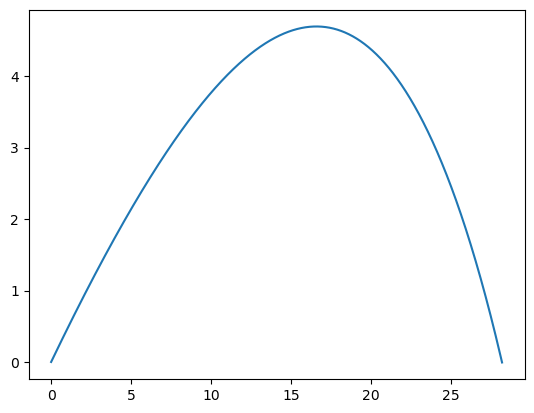

In [4]:
plt.plot(xlist, ylist)

# Position and Velocity Graphs 

Text(0, 0.5, 'Velocity (m/s)')

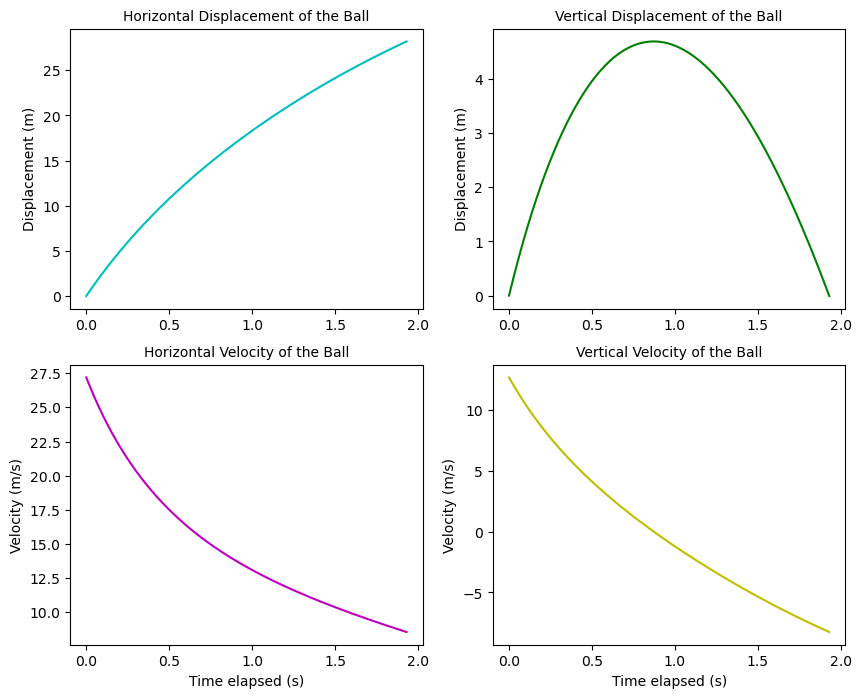

In [5]:
# All styling choices were taken from matplotlib's documentation: https://matplotlib.org/stable/index.html
# Position and velocity against time on one plot 
fig, axs = plt.subplots(2,2, figsize=(10,8)) # Creates two plots stacked on top of each other 

# Subplot 1: the x-position v. Time graph 
axs[0,0].plot(tlist, xlist, color = 'c') # Plot smooth curve with list values, assigned color as cyan 
axs[0,0].set_title(f"Horizontal Displacement of the Ball", fontsize = 10) # Added title and altered font size

# Added axes labels 
# axs[0].set_xlabel("Time elapsed (s)", fontsize = 10) # I commented this out because both shared the same x-axis and to minimize crowding 
axs[0,0].set_ylabel("Displacement (m)", fontsize = 10)

# Subplot 2: the Velocity v. Time graph 
axs[1,0].plot(tlist, vxlist, color = 'm') # Same as above, only changed to velocity list and color to magenta 
axs[1,0].set_title(f"Horizontal Velocity of the Ball", fontsize = 10) # Added title 

# Added axes labels 
axs[1,0].set_xlabel("Time elapsed (s)", fontsize = 10)
axs[1,0].set_ylabel("Velocity (m/s)", fontsize = 10)

# Subplot 3: 
axs[0,1].plot(tlist, ylist, color = 'g') # Plot smooth curve with list values, assigned color as cyan 
axs[0,1].set_title(f"Vertical Displacement of the Ball", fontsize = 10) # Added title and altered font size

# Added axes labels 
# axs[0].set_xlabel("Time elapsed (s)", fontsize = 10) # I commented this out because both shared the same x-axis and to minimize crowding 
axs[0,1].set_ylabel("Displacement (m)", fontsize = 10)

# Subplot 4: the y-velocity v. Time graph 
axs[1,1].plot(tlist, vylist, color = 'y') # Same as above, only changed to velocity list and color to magenta 
axs[1,1].set_title(f"Vertical Velocity of the Ball", fontsize = 10) # Added title 

# Added axes labels 
axs[1,1].set_xlabel("Time elapsed (s)", fontsize = 10)
axs[1,1].set_ylabel("Velocity (m/s)", fontsize = 10)